**Modelo do Perceptron**

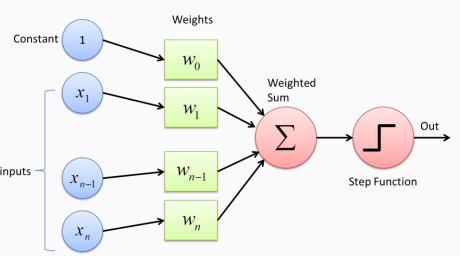

**Atualização dos pesos:**

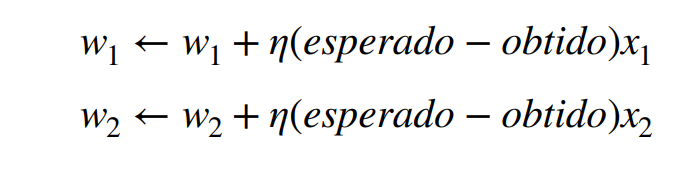

In [1]:
import random
random.seed(66)

class Perceptron:
  def __init__(self, data, learning_rate):
    self.data = data
    self.weights = self.generate_weights()
    self.learning_rate = learning_rate
    self.bias = random.randint(-1000, 1000)
    
  def generate_weights(self):
    w = []
    n_inputs = len(self.data[0]) #verifica quantas características cada entrada possui, para gerar a mesma quantidade de pesos pra cada entrada
    for i in range(0, n_inputs-1): #itera partindo da segunda posição; tira-se 1 ao n_inputs para ignorar a ultima posição do vetor, que indica a classe
      w.append(random.randint(-1000, 1000)) #preenche o vetor da segunda posição até a última
    return w #[w0, w1, w2, w3, ..., wn]

  def weighted_sum(self, X, W): # b + ∑ (Xn * Wn)
    if (len(X) != len(W)):
      raise SystemExit("X e W são de dimensões diferentes") 
    sum = 0
    for i in range(0, len(X)):
      sum += X[i]*W[i]
    return self.bias + sum 

  def step_function(self, v): 
    if(v > 0):
      return 1
    return 0

  def update_weights(self, out, exp, X, W):
    for i in range(0, len(W)):
      W[i] = W[i] + self.learning_rate*(exp-out)*X[i] #atualização dos pesos
    self.bias = self.bias + self.learning_rate*(exp-out)*1 #atualização do bias
    self.weights = W

  def train(self):
    error_flag = True
    epoch = 0
    while(error_flag): #época
      print(f"\n--------------------- \nÉpoca: {epoch}")
      epoch += 1
      iteration = 0
      error = 0
      for item in self.data: #iteração
        print(f"\nIteração: {iteration}\n")
        iteration += 1
        X = list(item.values()) #copia as características para uma lista temporária
        X.pop() #remove o último valor, que indica a classe
        print(f"X = {X}")
        print(f"W = {self.weights}")
        sum = self.weighted_sum(X, self.weights) #calcula a soma
        output = self.step_function(sum) #chama a função de ativação
        expected_class = list(item.values())[-1] #a classe é o último valor da lista dos dados, pode mudar conforme a implementação
        print(f"Saída: {output}, Classe esperada: {expected_class}")
        if(output != expected_class):
          #errou a saída
          self.update_weights(output, expected_class, X, self.weights)
          error +=1
        print(f"Total de erros da época atual: {error}")        
      if (error == 0):
        print(f"\nNenhum erro encontrado, algoritmo treinado") 
        error_flag = False
      if(epoch == 10000): #tentativas demais
        print("Os valores não são linearmente separáveis")
        break



In [ ]:
fruit1 = {"weight": 110, "length": 16.4, "class": 0}
fruit2 = {"weight": 116, "length": 18, "class": 0}
fruit3 = {"weight": 215, "length": 9, "class": 1}
fruit4 = {"weight": 199, "length": 11, "class": 1}
fruit5 = {"weight": 202, "length": 7, "class": 1}
fruit6 = {"weight": 139, "length": 14, "class": 0}

# fruits = [fruit1, fruit2, fruit3, fruit4]
fruits = [fruit1, fruit2, fruit3, fruit4, fruit5, fruit6]

neuron = Perceptron(data=fruits, learning_rate=0.01)
neuron.train()